# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [1]:
!kaggle datasets download -d khaledzsa/bus-breakdown-and-delays
!--unzip bus-breakdown-and-delays.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays
License(s): unknown
bus-breakdown-and-delays.zip: Skipping, found more recently modified local copy (use --force to force download)
/bin/bash: --: invalid option
Usage:	/bin/bash [GNU long option] [option] ...
	/bin/bash [GNU long option] [option] script-file ...
GNU long options:
	--debug
	--debugger
	--dump-po-strings
	--dump-strings
	--help
	--init-file
	--login
	--noediting
	--noprofile
	--norc
	--posix
	--pretty-print
	--rcfile
	--restricted
	--verbose
	--version
Shell options:
	-ilrsD or -c command or -O shopt_option		(invocation only)
	-abefhkmnptuvxBCHP or -o option


## Importing Libraries

In [2]:

!pip install tensorflow
!pip install pandas
!pip install numpy
!pip install sklearn
!pip install matplotlib seaborn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os as os

In [4]:
df = pd.read_csv('/content/bus-breakdown-and-delays.zip')

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [5]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
147967,False
147968,False
147969,False
147970,False


In [6]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [8]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [9]:
df.describe().sum()

,0
Busbreakdown_ID,7.917753e+06
Number_Of_Students_On_The_Bus,1.570420e+05


In [10]:
df.duplicated().sum()

0

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [11]:
df.dropna( axis=1, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 15 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Bus_No                           147972 non-null  object
 3   Schools_Serviced                 147972 non-null  object
 4   Occurred_On                      147972 non-null  object
 5   Created_On                       147972 non-null  object
 6   Bus_Company_Name                 147972 non-null  object
 7   Number_Of_Students_On_The_Bus    147972 non-null  int64 
 8   Has_Contractor_Notified_Schools  147972 non-null  object
 9   Has_Contractor_Notified_Parents  147972 non-null  object
 10  Have_You_Alerted_OPT             147972 non-null  object
 11  Informed_On                      147972 non-null  object
 12  Last_Updated_On 

In [13]:
from sklearn.datasets import make_circles, make_classification, make_moons
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout,Rescaling
import tensorflow as tf

from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [14]:
df.shape

(147972, 15)

In [15]:
df['Breakdown_or_Running_Late'].unique()

array(['Running Late', 'Breakdown'], dtype=object)

In [15]:
df[df.Salary.isnull()]

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [17]:

X,y = df.drop('Breakdown_or_Running_Late', axis=1), df['Breakdown_or_Running_Late']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [19]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)
df.info()

(29595, 14)
(118377, 14)
(29595,)
(118377,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 15 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Bus_No                           147972 non-null  object
 3   Schools_Serviced                 147972 non-null  object
 4   Occurred_On                      147972 non-null  object
 5   Created_On                       147972 non-null  object
 6   Bus_Company_Name                 147972 non-null  object
 7   Number_Of_Students_On_The_Bus    147972 non-null  int64 
 8   Has_Contractor_Notified_Schools  147972 non-null  object
 9   Has_Contractor_Notified_Parents  147972 non-null  object
 10  Have_You_Alerted_OPT             147972 non-null  object
 11  Informed_On                      1

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

<Axes: xlabel='Breakdown_or_Running_Late'>

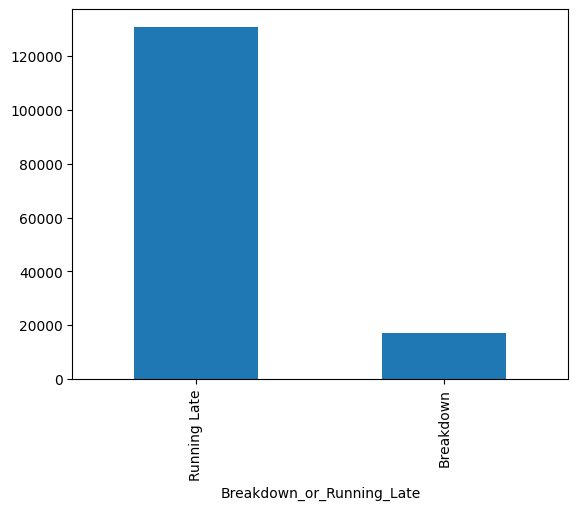

In [20]:
df['Breakdown_or_Running_Late'].value_counts().plot(kind='bar')

<Axes: xlabel='Breakdown_or_Running_Late', ylabel='count'>

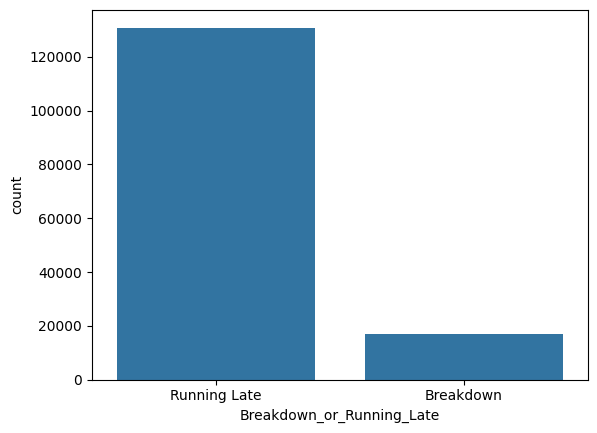

In [21]:
sns.countplot(x='Breakdown_or_Running_Late',data=df)

[link text](https://)## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [26]:
X=df.drop(['Breakdown_or_Running_Late'],axis=1)
y=df['Breakdown_or_Running_Late']

In [27]:
import tensorflow as tf
import keras
from keras import layers

In [28]:
inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [29]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [30]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [31]:
print("Fit model on training data")
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=2,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_val, y_val),
)

Fit model on training data
Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.5602 - sparse_categorical_accuracy: 0.8404 - val_loss: 0.1926 - val_sparse_categorical_accuracy: 0.9437
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1728 - sparse_categorical_accuracy: 0.9492 - val_loss: 0.1264 - val_sparse_categorical_accuracy: 0.9648


In [32]:
history.history

{'loss': [0.33701854944229126, 0.15828479826450348],
 'sparse_categorical_accuracy': [0.9027400016784668, 0.9530400037765503],
 'val_loss': [0.19260524213314056, 0.12641207873821259],
 'val_sparse_categorical_accuracy': [0.9437000155448914, 0.9648000001907349]}

In [33]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1478 - sparse_categorical_accuracy: 0.9569
test loss, test acc: [0.1313210129737854, 0.9616000056266785]
Generate predictions for 3 samples
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
predictions shape: (3, 10)


In [34]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [35]:
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

In [37]:
def get_uncompiled_model():
    inputs = keras.Input(shape=(784,), name="digits")
    x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
    x = layers.Dense(64, activation="relu", name="dense_2")(x)
    outputs = layers.Dense(10, activation="softmax", name="predictions")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


def get_compiled_model():
    model = get_uncompiled_model()
    model.compile(
        optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        metrics=["sparse_categorical_accuracy"],
    )
    return model

## Training the Model
Train the ANN model using the training data.

In [38]:
def get_uncompiled_model():
    inputs = keras.Input(shape=(784,), name="digits")
    x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
    x = layers.Dense(64, activation="relu", name="dense_2")(x)
    outputs = layers.Dense(10, activation="softmax", name="predictions")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


def get_compiled_model():
    model = get_uncompiled_model()
    model.compile(
        optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        metrics=["sparse_categorical_accuracy"],
    )
    return model

In [39]:
X_train_val,X_test,y_train_val,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
X_train,X_val,y_train,y_val=train_test_split(X_train_val,y_train_val,test_size=0.2,random_state=42)

In [45]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


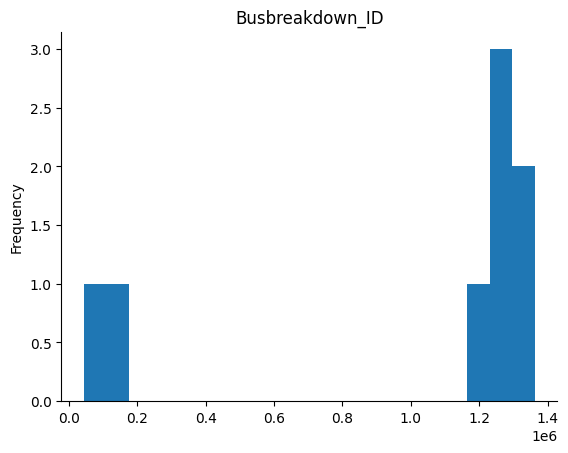

In [42]:
from matplotlib import pyplot as plt
_df_0['Busbreakdown_ID'].plot(kind='hist', bins=20, title='Busbreakdown_ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [44]:
columns=['Number_Of_Students_On_The_Bus','Busbreakdown_ID','','sex','occRole','race','hispanic']

In [47]:
# from keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(monitor='val_loss',patience=3)

history = model.fit(train,epochs=10,validation_data=val)

NameError: name 'train' is not defined

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [ ]:
model.evaluate(val)

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [ ]:
from sklearn.metrics import accuracy_score

prediction = model.predict(test) > 0.5

print(accuracy_score(np.concatenate([y for x, y in test], axis=0),prediction))

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

## Save the Model
Save the trained model for submission.

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

Answer

## Sorry for the bad, answers
#I just finished until EDA after i need more time to do practice and learn more. ):
